In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv('https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1')
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [67]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
Selling_Price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
KM_Driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [70]:
df.isnull().sum()

Brand            0
Model            0
Year             0
Selling_Price    0
KM_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [71]:
df_final = df.drop(['Brand','Model'],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           4340 non-null   int64 
 1   Selling_Price  4340 non-null   int64 
 2   KM_Driven      4340 non-null   int64 
 3   Fuel           4340 non-null   object
 4   Seller_Type    4340 non-null   object
 5   Transmission   4340 non-null   object
 6   Owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


In [72]:
df_final = pd.get_dummies(df_final,drop_first=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Year                          4340 non-null   int64
 1   Selling_Price                 4340 non-null   int64
 2   KM_Driven                     4340 non-null   int64
 3   Fuel_Diesel                   4340 non-null   uint8
 4   Fuel_Electric                 4340 non-null   uint8
 5   Fuel_LPG                      4340 non-null   uint8
 6   Fuel_Petrol                   4340 non-null   uint8
 7   Seller_Type_Individual        4340 non-null   uint8
 8   Seller_Type_Trustmark Dealer  4340 non-null   uint8
 9   Transmission_Manual           4340 non-null   uint8
 10  Owner_Fourth & Above Owner    4340 non-null   uint8
 11  Owner_Second Owner            4340 non-null   uint8
 12  Owner_Test Drive Car          4340 non-null   uint8
 13  Owner_Third Owner             434

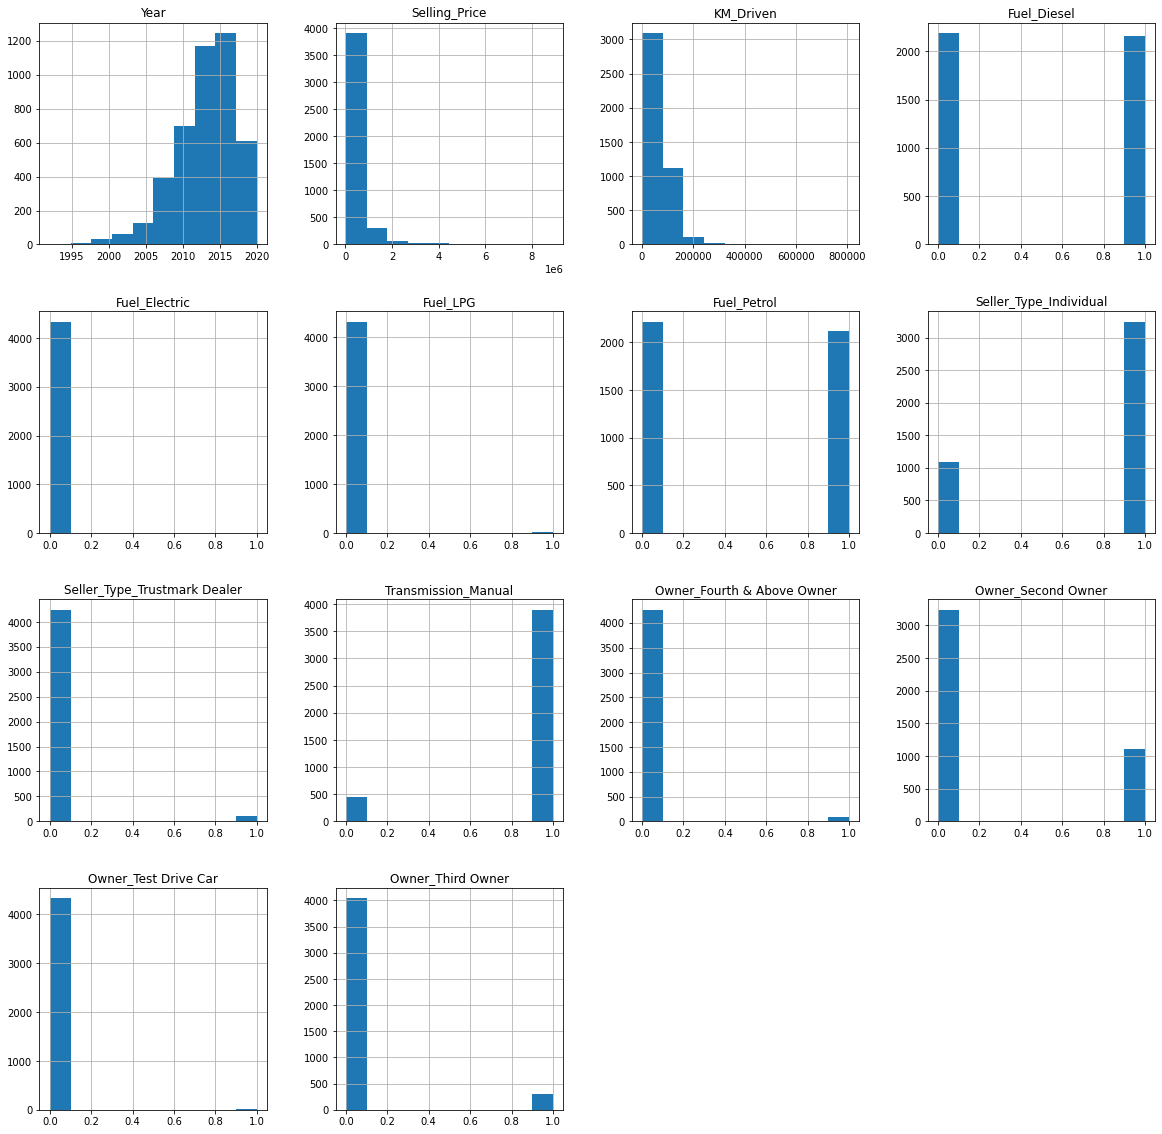

In [73]:
df_final.hist(figsize = (20,20))
plt.show()

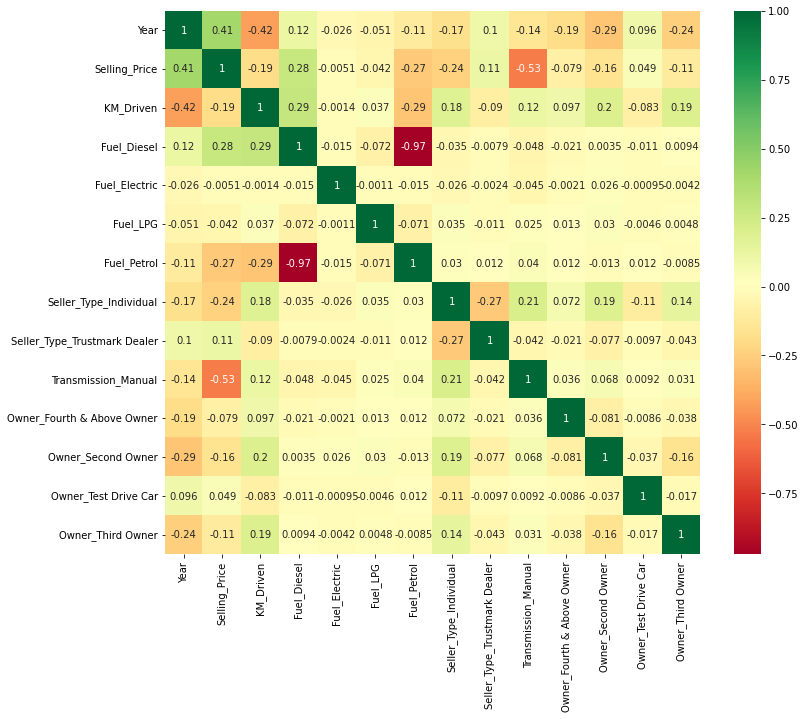

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(), annot=True,cmap ='RdYlGn')
plt.show()

In [75]:
x = df_final.iloc[:,1:]
y = df_final.iloc[:,0]

In [76]:
(train_X, test_X, train_Y, test_Y) = train_test_split(x, y, test_size = 0.25, random_state = 50)

print("Shape of train_X: " ,train_X.shape)
print("Shape of test_X: " ,test_X.shape)

Shape of train_X:  (3255, 13)
Shape of test_X:  (1085, 13)


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

**DECISION** **TREE**

In [78]:
dt = DecisionTreeClassifier()
dt.fit(train_X, train_Y)
dt_predict = dt.predict(test_X)

In [79]:
mae_dt = mean_absolute_error(test_Y, dt_predict)
mse_dt = mean_squared_error(test_Y, dt_predict)
print("MAE score of Decision tree model :" , mae_dt)
print("MSE score of Decision tree model :" , mse_dt)

MAE score of Decision tree model : 1.9271889400921658
MSE score of Decision tree model : 9.064516129032258


**RANDOM** **FOREST**

In [80]:
rf = RandomForestClassifier()
rf.fit(train_X, train_Y)
rf_predict = rf.predict(test_X)

In [81]:
mae_rf = mean_absolute_error(test_Y, rf_predict)
mse_rf = mean_squared_error(test_Y, rf_predict)
print("MAE score of Random Forest model :" , mae_rf)
print("MSE score of Random Forest model :" , mse_rf)

MAE score of Random Forest model : 1.8359447004608296
MSE score of Random Forest model : 8.580645161290322
